In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PLACEMENTPRO.csv')

In [3]:
df.shape

(199, 6)

In [4]:
df.head()

,SRN,Name,Stream,Backlogs,CGPA,Placed/not
0,PES1PG23CA274,Pooja E Achari,Computer science.,0,8.58,Yes
1,PES1PG23CA286,Ruchitha N,Computer science.,0,8.29,yes
2,PES1PG23CA254,Madhusudan V M,Electronics,3,8.91,No
3,PES1PG23CA277,Prajwal B M,IT,2,6.39,No
4,PES1PG23CA124,Sayanth S,Computer science.,4,6.24,No


In [6]:
df.describe()

,Backlogs,CGPA
count,199.000000,199.000000
mean,2.467337,7.246281
std,1.701956,1.315431
min,0.000000,5.030000
25%,1.000000,6.030000
50%,2.000000,7.230000
75%,4.000000,8.495000
max,5.000000,9.490000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SRN         199 non-null    object 
 1   Name        199 non-null    object 
 2   Stream      199 non-null    object 
 3   Backlogs    199 non-null    int64  
 4   CGPA        199 non-null    float64
 5   Placed/not  199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.isnull().sum()

SRN           0
Name          0
Stream        0
Backlogs      0
CGPA          0
Placed/not    0
dtype: int64

In [9]:
df.columns

Index(['SRN', 'Name', 'Stream', 'Backlogs', 'CGPA', 'Placed/not'], dtype='object')

In [10]:
df['Stream'].unique()

array(['Computer science.', 'Electronics', 'IT', 'Mechanical', 'Civil'],
      dtype=object)

In [11]:
from sklearn import preprocessing

In [49]:
le = preprocessing.LabelEncoder()
df['Placed/not'] = le.fit_transform(df['Placed/not'])
df['Stream'] = le.fit_transform(df['Stream'])


In [50]:
df.head()

,SRN,Name,Stream,Backlogs,CGPA,Placed/not
0,PES1PG23CA274,Pooja E Achari,1,0,8.58,1
1,PES1PG23CA286,Ruchitha N,1,0,8.29,2
2,PES1PG23CA254,Madhusudan V M,2,3,8.91,0
3,PES1PG23CA277,Prajwal B M,3,2,6.39,0
4,PES1PG23CA124,Sayanth S,1,4,6.24,0


In [14]:
df.describe()

,Stream,Backlogs,CGPA,Placed/not
count,199.000000,199.000000,199.000000,199.000000
mean,2.045226,2.467337,7.246281,0.095477
std,1.433004,1.701956,1.315431,0.311285
min,0.000000,0.000000,5.030000,0.000000
25%,1.000000,1.000000,6.030000,0.000000
50%,2.000000,2.000000,7.230000,0.000000
75%,3.000000,4.000000,8.495000,0.000000
max,4.000000,5.000000,9.490000,2.000000


In [15]:
df['Stream'].unique()

array([1, 2, 3, 4, 0])

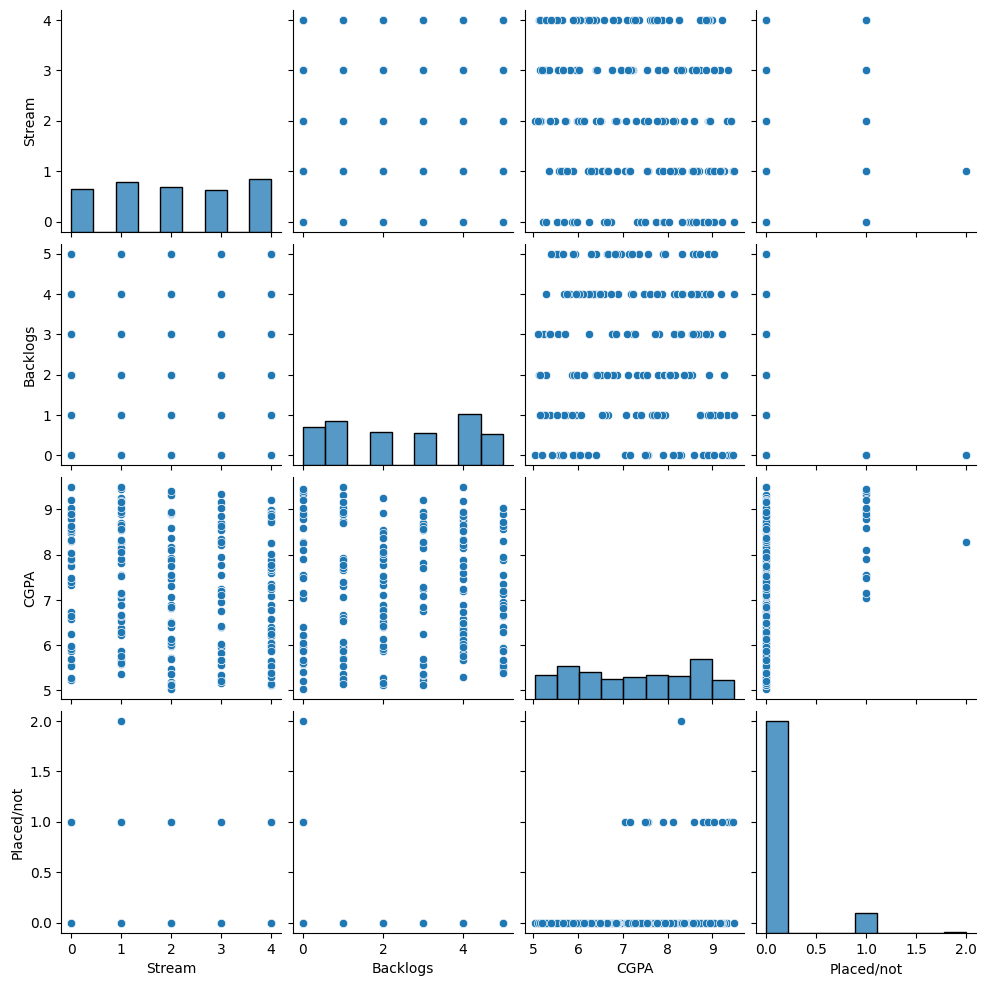

In [16]:
sns.pairplot(df)

              Stream  Backlogs      CGPA  Placed/not
Stream      1.000000  0.047202 -0.119782   -0.134273
Backlogs    0.047202  1.000000 -0.005784   -0.446899
CGPA       -0.119782 -0.005784  1.000000    0.274565
Placed/not -0.134273 -0.446899  0.274565    1.000000


<Axes: >

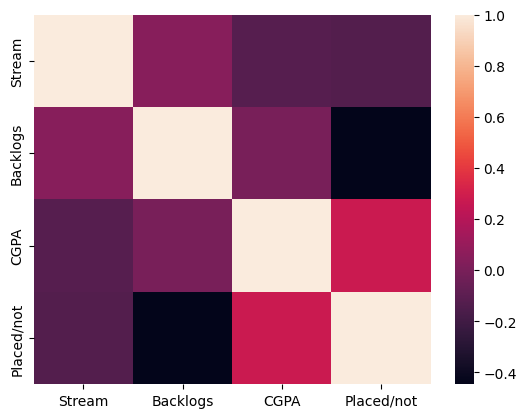

In [17]:
numerical_df = df.select_dtypes(include=[float, int])
tc = numerical_df.corr()
print(tc)
sns.heatmap(tc)

In [25]:
x = df.drop(['Name', 'SRN','Stream','Placed/not'], axis=1) 
x





,Backlogs,CGPA
0,0,8.58
1,0,8.29
2,3,8.91
3,2,6.39
4,4,6.24
...,...,...
194,1,9.16
195,2,6.14
196,4,7.76
197,0,5.20


In [26]:
y = df['Placed/not']
y

0      1
1      2
2      0
3      0
4      0
      ..
194    0
195    0
196    0
197    0
198    1
Name: Placed/not, Length: 199, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [28]:
x_train

,Backlogs,CGPA
77,4,8.35
73,2,6.51
71,0,5.41
78,0,8.11
42,4,8.58
...,...,...
0,0,8.58
184,5,5.88
131,4,8.90
152,3,5.11


In [29]:
x_test

,Backlogs,CGPA
40,2,8.17
51,4,8.76
189,5,5.39
130,5,6.66
190,0,7.16
82,4,8.86
151,4,8.85
46,4,7.88
70,1,6.53
100,1,7.30


In [30]:
y_train

77     0
73     0
71     0
78     1
42     0
      ..
0      1
184    0
131    0
152    0
106    0
Name: Placed/not, Length: 139, dtype: int32

In [31]:
y_test

40     0
51     0
189    0
130    0
190    1
82     0
151    0
46     0
70     0
100    0
115    0
83     0
25     0
137    0
158    0
195    0
95     0
3      0
41     0
58     0
14     0
162    0
12     0
6      0
141    0
160    0
112    0
121    0
101    0
86     0
64     0
47     0
168    0
34     1
38     0
183    0
4      0
72     0
67     0
156    0
126    0
114    0
154    0
15     0
61     0
128    0
143    0
174    0
23     0
186    0
31     0
103    0
89     0
196    0
109    0
125    0
17     0
30     0
177    0
161    0
Name: Placed/not, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[57,  1],
       [ 1,  1]], dtype=int64)

In [35]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.9666666666666667

In [36]:
pre = metrics.precision_score(y_test,y_pred)
pre

0.5

In [37]:
re = metrics.recall_score(y_test,y_pred)
re

0.5

In [38]:
f1 = metrics.f1_score(y_test,y_pred)
f1

0.5

In [60]:
def predict_placement(cgpa, backlogs):
    if backlogs == 0 and cgpa > 7:
        return "Placed"
    else:
        return "Not Placed"

cgpa = 4.6
backlogs = 0

status = predict_placement(cgpa,backlogs)

print(status)


Not Placed
